In [ ]:
import pandas as pd
from source.read_data import read_data
from source.calculate_rsi import calculate_rsi
from source.generate_positions import generate_positions
from source.backtest import run_backtest
from source.metrics import calculate_portfolio_metrics

# Backtesting Trade Strategy

In [ ]:
# Read price data
prices_close, prices_open = read_data(use_backup = True)
# Calculate RSI data
rsi_close = calculate_rsi(prices_close, "sma", 14)
# Generate positions_signals
positions_signals = generate_positions(rsi_close, buy_level = 25, sell_level = 75, exit_rsi = None).fillna(0)
# Run backtest
portfolio, portfolio_value, trade_count = run_backtest(positions_signals, prices_open, prices_close)
aum = portfolio_value.sum(axis = 1)
# Run metrics
metrics, metadata = calculate_portfolio_metrics(aum, trade_count, portfolio, prices_open)
final_metrics = pd.Series(metrics).round(4)

final_metrics

Total Return                   1.8662
Annualised Return              0.0486
Annualised Volatility          0.2143
Maximum Drawdown               0.6484
Sharpe Ratio                   0.1280
Sortino Ratio                  0.2012
Total Number of Trades      1504.0000
Average Return per Trade       0.0012
Win Rate                       0.6918
Expectancy                  6009.3000
dtype: float64

In [ ]:
from config import CAPITAL_0, BACKTEST_START, BACKTEST_END
import yfinance as yf
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'NAV')

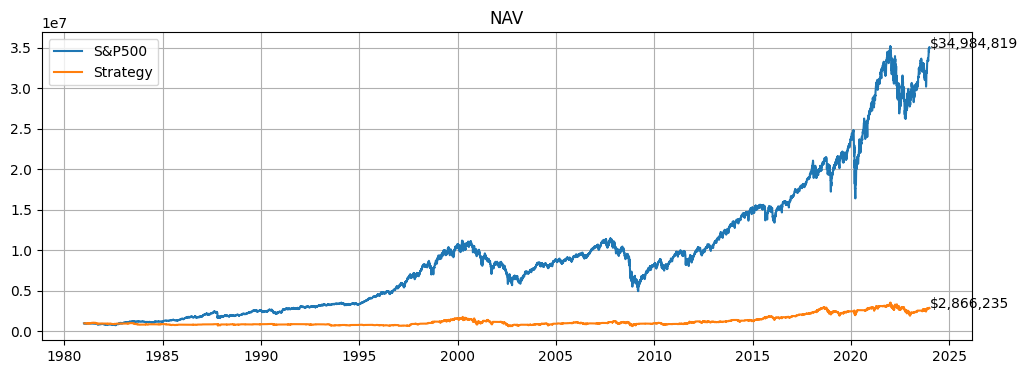

In [ ]:
sp500 = yf.Ticker("^GSPC").history(start = BACKTEST_START, end = BACKTEST_END, auto_adjust = True)
sp500_investment = sp500.loc[:, "Close"] / sp500.loc[:, "Close"].iloc[0] * CAPITAL_0

fig, ax = plt.subplots(figsize = (12, 4))
ax.plot(sp500_investment, label = "S&P500")
ax.plot(aum, label = "Strategy")
ax.text(s = f"${round(sp500_investment.iloc[-1]):,}", x = BACKTEST_END, y = sp500_investment.iloc[-1])
ax.text(s = f"${round(aum.iloc[-1]):,}", x = BACKTEST_END, y = aum.iloc[-1])
ax.legend()
ax.grid()
ax.set_title("NAV")